<h1 style="text-align:center;">Nerve Quadrature Analysis</h1>
<h3 style="text-align:center;margin:0;">Vijay Stroup</h3>
<p style="text-align:center;margin:0;">University of Central Florida • November 6, 2021</p>

# Introduction

In a study conducted by John Cahn, John Mallet-Paret, and Erik van Vleck on 
["Traveling Wave Solutions for Systems of ODEs on a Two-Dimensional Spatial Lattice"](http://www.jstor.org/stable/118432), 
they have deduced an function $\psi$ to represent an electrical impuluse in the human nervious 
system. 

Consider the function $\psi: \mathbb{R}\rightarrow\mathbb{R}$

$$
\psi(x) =
\frac{1}2 + \frac{1}\pi \int_0^\infty \frac{A(s)sin(sx)}{s(A(s)^2 + c^2s^2)} ds +
\frac{c}\pi \int_0^\infty \frac{cos(sx)}{A(s)^2 + c^2s^2} ds
$$

$$ A(s) = 1 + 2(1 - cos(s)) $$

$\psi$ is the wave function representation of We can use different methods of 
integration to estimate $\psi$ at different values of x and c.  

The methods of quadrature approximation that will be used in this project will 
be the following:  
<br/>
Midpoint: $$\int_a^b f(x) dx \approx (b-a)f(\frac{b+a}2)$$  
<br/>
Trapezoidal: $$\int_a^b f(x) dx \approx \frac{b-a}2 (f(a)+f(b)$$  
<br/>
Simpson: $$\int_a^b f(x) dx \approx \frac{h}3 (f(a) + 4f(a+h) + f(a+2h)), \qquad h=\frac{b-a}2$$  
<br/>

In genearl, we can write a quadrature formula as
$$\int_a^b f(x)dx \approx \sum_{i=1}^n w_i f(x_i)$$
where we want to choose weights $w_i$ and nodes so that the formula is as accurate as possible.

When doing quadrature analysis, we run into the problem of not knowing what the 
exact integral will be when comparing for error. Thus, we must use specific 
algorithms that do not require a compairson of the exact answer.  

For the Midpoint rule, we can use the following equation to get the error of each
iteration:
$$|\int_a^b f(x) dx - M_n| \leq \frac{(b-a)^3}{24n^2} \max_{x \in [a,b]} |f''(x)|$$  

<br/>

For The Trapezoidal rule, we can use Richardson's Error Estimate to determine
how accurate each iteration is. Richardson's Error Estimate is defined as:
$$|\int_a^b f(x) dx - T_n| \leq \frac{(b-a)^3}{12n^2} \max_{x \in [a,b]} |f''(x)|$$  

<br/>

For Simpson's rule, we can use the error term defined as:
$$|\int_a^b f(x) dx - S_n| \leq \frac{(b-a)^5}{180n^4} \max_{x \in [a,b]} |f^{(4)}(x)|$$  

I believe that Simpson's Rule will be more accurate when estimaing what this function should be. It will also be able to be more accurate with many less nodes than required by the trapezodial rule. This is shown by calculating the number of nodes needed to achieve a certain error for both methods.

For our function $\psi$, it is reasonable to vary c within the interval [0, 10] 
and then choose values of x that will capture a good amount of data without 
sacrificing a lot of time. This can be done by checking, on each iteration, the
result relative to the previous iteration and cutting it off after a certain
threshold.  

Things to think about when analyzing this problem are:
- Our limits of integration are from 0 to $\infty$, what would be a good cut off point for
    our upper bound?
- What happens we set c=0 which is still in our acceptable range? It would make
    the third term of $\psi$ go to 0.
- Compounding error on each iteration?

# Analyis

We can first start off by visualizing the second and third integrand functions.  
We can see both of them have the trigonometric functions sin and cos so we should 
expect the plots to be bounded to 1 and have some type of damping effect with a
maximum at x=0.

In [2]:
# import all libraries needed for this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad, trapezoid, simpson
from scipy.misc import derivative
import warnings

warnings.filterwarnings('ignore') # ignore warnings from scipy integrate to inf
%matplotlib inline

In this analysis, I1 will be refered to as the integrand in the second term in $\psi$:
$$\frac{A(s)sin(sx)}{s(A(s)^2 + c^2s^2)}$$  

Conversely, I2 is the integrand in the third term of $\psi$:
$$\frac{cos(sx)}{A(s)^2 + c^2s^2}$$  

In [3]:
A = lambda s: 1 + 2 * (1 - np.cos(s)) # A(s)
I1 = lambda s, c, x: (A(s) * np.sin(s*x)) / (s * (A(s)**2 + c**2 * s**2))
I2 = lambda s, c, x: np.cos(s*x) / (A(s)**2 + c**2 * s**2)

def integral_plots(xs, c, x):
    I1_values = [I1(i, c, x) for i in xs]
    I2_values = [I2(i, c, x) for i in xs]

    _, ax = plt.subplots(1, 2)

    ax[0].plot(xs, I1_values)
    ax[0].set_title('I1')
    ax[0].set_xlabel('s')
    ax[0].set_ylabel('value')

    ax[1].plot(xs, I2_values)
    ax[1].set_title('I2')
    ax[1].set_xlabel('s')
    ax[1].set_ylabel('value')

    plt.subplots_adjust(wspace=.5)
    plt.show()

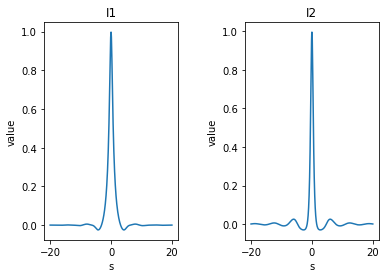

In [10]:
xs = np.linspace(-20, 20, 500)
c, x = 1, 1
integral_plots(xs, c, x)

Here we observe I1 and I2 with x and x being set to 1. They have a maximum at s=0
and dampen symmetrically moving away from s=0.  

We can then vary these parameters to see how it affects our function.

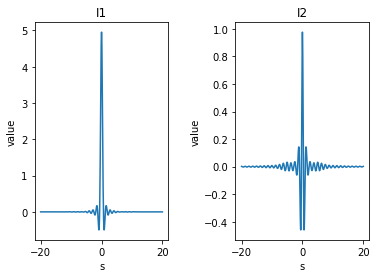

In [11]:
xs = np.linspace(-20, 20, 500)
c, x = 1, 5
integral_plots(xs, c, x)

We can easily see that increasing the value of x yeilds a higher frequency.

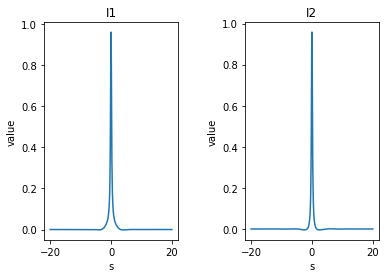

In [12]:
xs = np.linspace(-20, 20, 500)
c, x = 5, 1
integral_plots(xs, c, x)

When we increase c while keeping x constant, the dampening effect happens more harshly.

Now that we have observed these transformations, we can view the extremas of our
intervals.

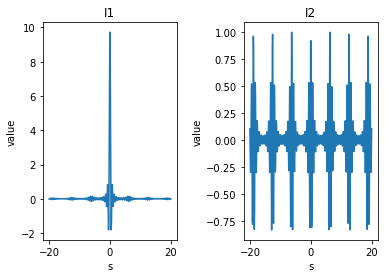

In [13]:
xs = np.linspace(-20, 20, 500)
c, x = 0, 10
integral_plots(xs, c, x)

When setting c to 0 for $\psi$, we know the third term will equal 0 so the high
fluctuations of I2 will not be considered. What is good to note is that for I1,
the value has a maximum still at 0, however falls off very quickly as s increases.

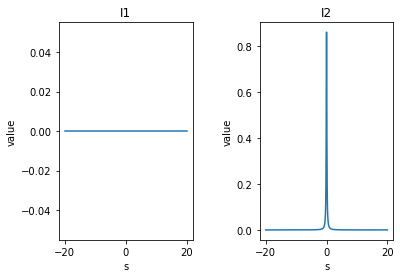

In [14]:
xs = np.linspace(-20, 20, 500)
c, x = 10, 0
integral_plots(xs, c, x)

In the case of x=0, I1 will always be equal to 0 due to $sin(x)$, and I2 will 
quickly go to 0 with no dampening effect.

We can now visualize $\psi(x),\quad x\in[-10, 10]$ to get a better picture 
of what to expect from our approximations.  
We will just use the basic quad method from scipy to use as visualization of $\psi$.

In [4]:
def plot_psi(xs, c):
    ys = []
    for x in xs:
        a = quad(I1, 0, np.inf, args=(c, x))
        b = quad(I2, 0, np.inf, args=(c, x))
        y = 1/2 + (1/np.pi * a[0]) + (c/np.pi * b[0])
        ys.append(y)

    _, ax = plt.subplots(1, 2)

    ax[0].plot(xs, ys)
    ax[0].set_title('psi')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('value')

    ax[1].plot(xs, ys)
    ax[1].set_title('psi zoomed in')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('value')
    ax[1].set_xlim(-3, 3)

    plt.subplots_adjust(wspace=.5)
    plt.show()

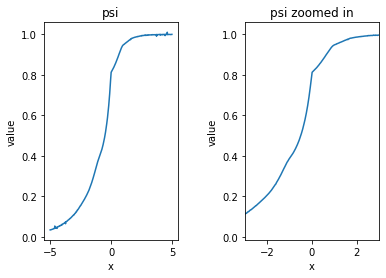

In [16]:
c = 1
xs = np.linspace(-5, 5, 500)
plot_psi(xs, c)

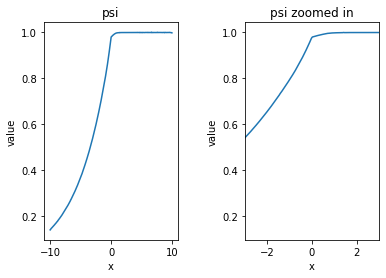

In [17]:
c = 5
xs = np.linspace(-10, 10, 500)
plot_psi(xs, c)

Here we can observe that if we increase c, the plateau is reached more dramatically.
We should then expect that at our lower bound for $\psi$ to be unstable.  

Let us take a look at the two extremas of our interval for c.

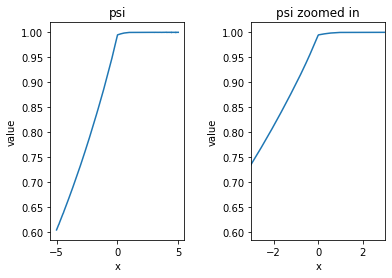

In [18]:
c = 10
xs = np.linspace(-5, 5, 500)
plot_psi(xs, c)

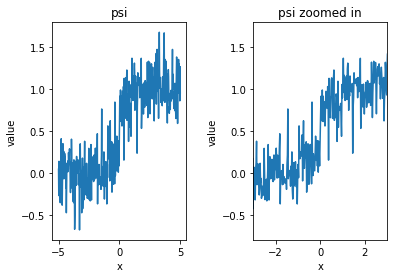

In [19]:
c = 0
xs = np.linspace(-5, 5, 500)
plot_psi(xs, c)

As predicted, at c=0, our function becomes very unstable with high fluctuations
throughout the whole x interval.  
On the contrary, it is also observed that the function's plateau is reached sharply.  

This leads me to believe that c and the error $\epsilon$, will have a direct
corrorlation.

Before we begin to approximate $\psi(x)$ with our different methods, we have to
determine what is a proper interval of our integrals. From our visualisation of
$\psi(x)$ above, we know there is a plateau. Our goal should be to find the x
value in which the relative difference on the x+1 value is insignificant. Let us
choose $10^{-4}$ to be the cut-off point in which we determine the current x value 
is the maximum x in that interation we will use as our bounds for the integrals.  
We also want to choose a constant c value that will be good. If our c value is 
too low, we may run into the issue of the relative difference never reaching the 
threshold due to the high fluctuations. On the other side, if we choose a c value
that is too large, we risk of cutting off part of the data too early. This is 
something good to observe from the above plots and to experiment with to determine
what a good value for c should be. For this project, I have selected c to be 5
to allow enough iterations of x while still being able to reach the threshold.

Let us now begin to analyze the different quadrature methods mentioned in the 
introduction.

First we will define the function $\psi(x)$

In [4]:
def psi(c, x, domain, f):
    I1_func_values = [I1(s, c, x) for s in domain]
    I2_func_values = [I2(s, c, x) for s in domain]

    I1_approx = f(I1_func_values, domain)
    I2_approx = f(I2_func_values, domain)

    if f == trapezoid:
        I1_errors = [np.abs((domain[-1] - domain[0])**3 / (12 * len(domain)**2) * derivative(I1, s, n=2, order=5, args=(c, x))) for s in domain]
        I2_errors = [np.abs((domain[-1] - domain[0])**3 / (12 * len(domain)**2) * derivative(I2, s, n=2, order=5, args=(c, x))) for s in domain]
    elif f == simpson:
        I1_errors = [np.abs((domain[-1] - domain[0])**5 / (180 * len(domain)**4) * derivative(I1, s, n=4, order=5, args=(c, x))) for s in domain]
        I2_errors = [np.abs((domain[-1] - domain[0])**5 / (180 * len(domain)**4) * derivative(I2, s, n=4, order=5, args=(c, x))) for s in domain]

    I1_error = np.mean(np.array(I1_errors)[~np.isnan(I1_errors)])
    I2_error = np.mean(np.array(I2_errors)[~np.isnan(I2_errors)])

    return 1/2 + (1/np.pi * I1_approx) + (c/np.pi * I2_approx), I1_error, I2_error

Next, let's define some of the constants for all the methods of our analysis.

In [5]:
xs = np.arange(1000) # [0, 1, 2, ... 999]
threshold = 10e-4
c = 5

We can then create a function to return the value of $\psi$ along the xs defined
above dependent on the method we pass to it.

In [6]:
def solve(f):
    x_used = []
    approximations = []
    relative_differences = []
    errors = []

    prev = 0
    domain = np.arange(1, 100_000)
    for x in xs:
        approx, I1_error, I2_error = psi(c, x, domain, f)
        errors.append([I1_error, I2_error])
        rel_diff = abs(approx - prev)
        x_used.append(x)
        approximations.append(approx)
        relative_differences.append(rel_diff)

        if rel_diff <= threshold: break
        prev = approx

    return np.array(x_used)+1, approximations, relative_differences, errors

### Midpoint

We can derive the number of nodes we want to use to make sure our error is less 
than $10^{-4}$.  

<br/>

$$n = \sqrt{\frac{(b-a)^3}{24\epsilon} f''(x)}, \qquad \epsilon=10^{-4}$$  

The derivatives of I1 and I2 are very long and would take very long to work out
by hand. To simplify this, we can use scipy's derivative function to get the
$n^{th}$ derivative at a point $x_0$. Because we need the max value of $f''(x)$,
we can just evalute both points of the interval to get the max and use that as 
our value when substituting back into getting the number of nodes. With this in
mind, our error on each iteration will be constant, but the number of nodes may
change.

In [11]:
def midpoint(f, x, a=0, b=100_000, n=100_000):
    errors = [np.abs((100_000 - 0)**3 / (24 * n**2) * derivative(f, s, n=2, order=5, args=(c, x))) for s in np.arange(100_000)]

    h = (b - a) / n
    result = 0
    for i in range(n):
        result += f((a + h / 2) + i * h, c, x)
    result *= h
    return result, np.mean(errors)

def solve_midpoint():
    x_used = []
    approximations = []
    relative_differences = []
    errors = []

    prev = 0
    for x in xs:
        I1_approx, I1_error = midpoint(I1, x)
        I2_approx, I2_error = midpoint(I2, x)
        approx = 1/2 + (1/np.pi * I1_approx) + (c/np.pi * I2_approx)
        rel_diff = abs(approx - prev)

        print(approx, rel_diff)

        x_used.append(x)
        errors.append([I1_error, I2_error])
        approximations.append(approx)
        relative_differences.append(rel_diff)

        if rel_diff <= threshold: break
        prev = approx

    return x_used, approximations, relative_differences, errors

In [12]:
x_used, approximations, relative_differences, errors = solve_midpoint()

0.7582785017565876 0.7582785017565876
0.7300220841981384 0.02825641755844921
0.6744423271863992 0.05557975701173923
0.6054222297188646 0.06902009746753457
0.521647178031338 0.08377505168752664
0.42015941191432005 0.10148776611701793
0.29085089156521216 0.1293085203491079
0.258221748677816 0.032629142887396156
0.3084035758492182 0.05018182717140218
0.37364416811957235 0.06524059227035417
0.4529685075668221 0.07932433944724976
0.5492361327823184 0.09626762521549631
0.6665884388535538 0.11735230607123537
0.7501839417645182 0.0835955029109644
0.7076489389922049 0.04253500277231326


In [17]:
middf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'relative_diff': relative_differences,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
})
middf

,x,approximation,relative_diff,I1_error,I2_error
0,0,0.500314,0.500314,NaN,154989.569726
1,1,0.499783,0.000531,NaN,157996.597506


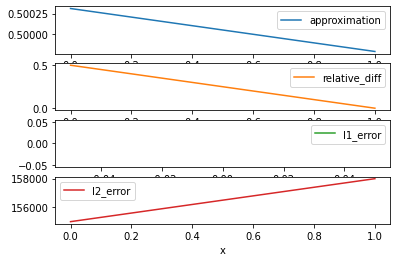

In [18]:
middf.plot('x', subplots=True, sharex=False)
plt.show()

### Trapezoid

In [10]:
x_used, approximations, relative_differences, errors = solve(trapezoid)

In [11]:
trapdf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'relative_diff': relative_differences,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
})
trapdf

,x,approximation,relative_diff,I1_error,I2_error
0,1,0.565827,0.565827,0.000000,0.080426
1,2,0.516215,0.049612,0.003696,0.082490
2,3,0.489756,0.026459,0.008661,0.088133
3,4,0.482646,0.007110,0.003935,0.098279
4,5,0.478722,0.003924,0.009829,0.091512
5,6,0.483540,0.004818,0.005131,0.083879
6,7,0.532358,0.048818,0.000842,0.080560
7,8,0.528478,0.003880,0.002361,0.081430
8,9,0.494395,0.034083,0.007476,0.086813
9,10,0.483898,0.010497,0.008883,0.095386


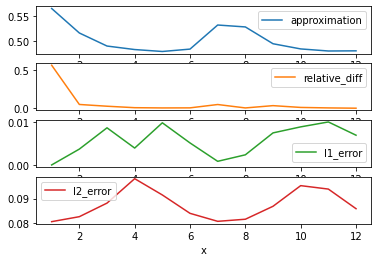

In [12]:
trapdf.plot('x', subplots=True, sharex=False)
plt.show()

When visualizing the plots above, we see that the approximations behind to lessen
with then a relative max at around x=7, and then starts to go back down again.
This is most likely due to the trigonometric nature of the function and if we were
let this go on for longer, we should see it fluctuate like that.

### Simpson

In [58]:
x_used, approximations, relative_differences, errors = solve(simpson)

In [59]:
simpdf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'relative_diff': relative_differences,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
})
simpdf

,x,approximation,relative_diff,I1_error,I2_error
0,1,0.559850,0.559850,0.000000e+00,5.867530e-09
1,2,0.509018,0.050832,2.316055e-11,5.984522e-09
2,3,0.485159,0.023859,1.565473e-10,6.457555e-09
3,4,0.498548,0.013389,1.406967e-10,7.120203e-09
4,5,0.486150,0.012398,2.214673e-10,6.639671e-09
5,6,0.480824,0.005326,4.186144e-11,6.071918e-09
6,7,0.526773,0.045950,6.990025e-12,5.876363e-09
7,8,0.521536,0.005238,1.562805e-11,5.925269e-09
8,9,0.488229,0.033306,1.039698e-10,6.269207e-09
9,10,0.490420,0.002191,2.751143e-10,6.938905e-09


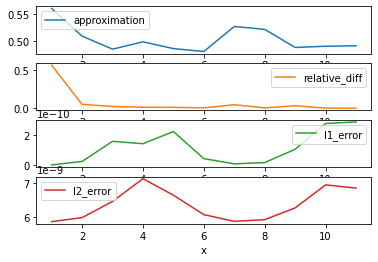

In [60]:
simpdf.plot('x', subplots=True, sharex=False)
plt.show()

Let us now inspect our data.

In [61]:
print(f'Mean I1 error: {trapdf.I1_error.mean()}')
print(f'Mean I2 error: {trapdf.I2_error.mean()}')
trapdf.describe()

Mean I1 error: 0.005647908405823799
Mean I2 error: 0.08738966796369523


,x,approximation,relative_diff,I1_error,I2_error
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,0.501298,0.063295,0.005648,0.087390
std,3.605551,0.028066,0.159266,0.003491,0.006128
min,1.000000,0.478722,0.000323,0.000000,0.080426
25%,3.750000,0.481993,0.004123,0.003362,0.082225
50%,6.500000,0.486827,0.008803,0.006032,0.086310
75%,9.250000,0.519281,0.037767,0.008716,0.092124
max,12.000000,0.565827,0.565827,0.010028,0.098279


In [62]:
print(f'Mean I1 error: {simpdf.I1_error.mean()}')
print(f'Mean I2 error: {simpdf.I2_error.mean()}')
simpdf.describe()

Mean I1 error: 1.1550928650578054e-10
Mean I2 error: 6.363433079750187e-09


,x,approximation,relative_diff,I1_error,I2_error
count,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01
mean,6.000000,0.503442,0.068479,1.155093e-10,6.363433e-09
std,3.316625,0.024085,0.163895,1.081589e-10,4.620694e-10
min,1.000000,0.480824,0.000934,0.000000e+00,5.867530e-09
25%,3.500000,0.487190,0.005282,1.939430e-11,5.954896e-09
50%,6.000000,0.491354,0.013389,1.039698e-10,6.269207e-09
75%,8.500000,0.515277,0.039628,1.890073e-10,6.743145e-09
max,11.000000,0.559850,0.559850,2.851668e-10,7.120203e-09
